In [ ]:
seq="ACGT"


In [ ]:
seq[1]

'C'

In [ ]:
len(seq)

4

In [ ]:
seq1="AACC"
seq2="GGTT"
print(seq1+seq2)

AACCGGTT


In [ ]:
seqs=["A","C","T","G"]

print(''.join(seqs))

ACTG


In [ ]:
import random
random.choice("ACGCTCGCGCC")

'C'

In [ ]:
seq=''
for _ in range(15):
  seq+=random.choice("ACTG")
print(seq)

TAAGAAGCTTACTGA


In [ ]:
seq[3:5]

'GA'

In [ ]:
seq[:3]

'TAA'

In [ ]:
seq[7:]

'CTTACTGA'

In [ ]:
seq[-3:]

'TGA'

In [ ]:
seq=''.join([random.choice("ACTG") for _ in range(10)])
seq

'GACGACATTG'

In [ ]:
def match(s1,s2):
  if not len(s1)==len(s2):
    return False
  for i in range(0,len(s1)):
    if not s1[i]==s2[i]:
      return False
  return True



match("ACGCGCTC","AGAGAGA")


False

In [ ]:
def longestcommonprefix(s1,s2):
  i=0
  while i<len(s1) and i<len(s2) and s1[i]==s2[i]:
    i+=1
  return s1[:i]


longestcommonprefix('ACCATTG', 'ACCAAGTC')


'ACCA'

In [ ]:
complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
complement['A']

'T'

In [ ]:
def reversecomplement(s):
  complement={'A':'T','C':'G','G':'C','T':'A'}
  t=''
  for base in s:
    t=complement[base]+t
  return t
reversecomplement('AAGAGAGATAACCCCC')



'GGGGGTTATCTCTCTT'

In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa


--2024-07-13 10:14:55--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.238.180.152, 18.238.180.156, 18.238.180.106, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.238.180.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.06s   

2024-07-13 10:14:55 (752 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [ ]:
def readGenome(filename):
  genome=''
  with open(filename,'r') as f:
    for line in f:
      if not line[0]=='>':
        genome+=line.rstrip()
  return genome

genome=readGenome('lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [ ]:
counts={'A':0,'C':0,'T':0,'G':0}
for base in genome:
  counts[base]+=1

print(counts)

{'A': 12334, 'C': 11362, 'T': 11986, 'G': 12820}


In [ ]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq


--2024-07-13 10:15:05--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.238.180.152, 18.238.180.156, 18.238.180.106, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.238.180.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K  1.09MB/s    in 0.2s    

2024-07-13 10:15:06 (1.09 MB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [ ]:
def readFastq(filename):
  sequences=[]
  qualities=[]
  with open(filename) as fh:
    while True:
      fh.readline()
      seq=fh.readline().rstrip()
      fh.readline()
      qual=fh.readline().rstrip()
      if len(seq)==0:
        break
      sequences.append(seq)
      qualities.append(qual)
  return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

print(seqs)

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTACCCCTAACCCCCAACCCTCACACCAACCCTAACCCTACCCCCAACCCCAC', 'TAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGCTGGGTTAGGGGTAGGGTTAGGGTTAGGGTTAGGGGTAGGAGTTCGGGAGAGCACACG', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCTAACCCTAAACCCAAACCTAAA', 'AGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTGGGGTTAGGGTTGG', 'TAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTT

In [ ]:
print(quals)

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################', 'CCCFFDFDHGHHDHHGIIIHGIJ<GBBBFBGGHDIH@B)?)0?F>DB#####################################################', "???=DD0@3ADB<<CE;+3<;EE?1:)1?C1?3BDCB@;)99)0;@;)-(.7A'55A1?.6;(6;.5;;??#############################", "@@@DDF?EFFHA;DDHGI<FDFGECCHF:C9DH9F3):??GHB)BFHEAHBG;C';C@EE45?#####################################", '@@@FADDFHGBFFHJJJFGEHGGGGCEGHCBFGGJ:D?FGIDHDFGIBFDGIJ=CEHDH7?=BFD@A;>AB5=2=?BB######################', '@CCFFADDHHH<CBGIICGGHIJI?FFGHJ?DHGIJ?DGIIIBFCHHI8@@GEE.==A?C##

In [ ]:
def phred33ToQ(qual):
  return ord(qual)-33
phred33ToQ('T')

51

In [ ]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


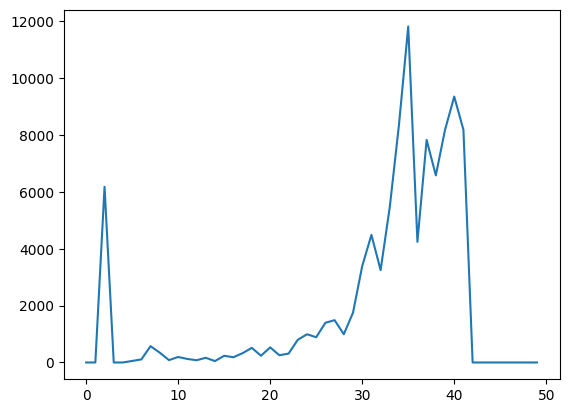

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(len(h)),h)
plt.show()

In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq


--2024-07-13 10:15:27--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.238.180.158, 18.238.180.106, 18.238.180.156, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.238.180.158|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.1’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.04s   

2024-07-13 10:15:27 (5.25 MB/s) - ‘SRR835775_1.first1000.fastq.1’ saved [224786/224786]



In [ ]:
def readFastq(filename):
  sequences=[]
  qualities=[]
  with open(filename) as fh:
    while True:
      fh.readline()
      seq=fh.readline().rstrip()
      fh.readline()
      qual=fh.readline().rstrip()
      if len(seq)==0:
        break
      sequences.append(seq)
      qualities.append(qual)
  return sequences, qualities
seqs,quals=readFastq('SRR835775_1.first1000.fastq')
print(seqs)

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTACCCCTAACCCCCAACCCTCACACCAACCCTAACCCTACCCCCAACCCCAC', 'TAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGCTGGGTTAGGGGTAGGGTTAGGGTTAGGGTTAGGGGTAGGAGTTCGGGAGAGCACACG', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCTAACCCTAAACCCAAACCTAAA', 'AGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTGGGGTTAGGGTTGG', 'TAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTT

In [ ]:
def phred33ToQ(qual):
  return ord(qual)-33


In [ ]:
def creatHist(qualities):
  hist=[0]*50
  for qual in qualities:
    for phred in qual:
      q=phred33ToQ(phred)
      hist[q]+=1
  return hist

h=createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


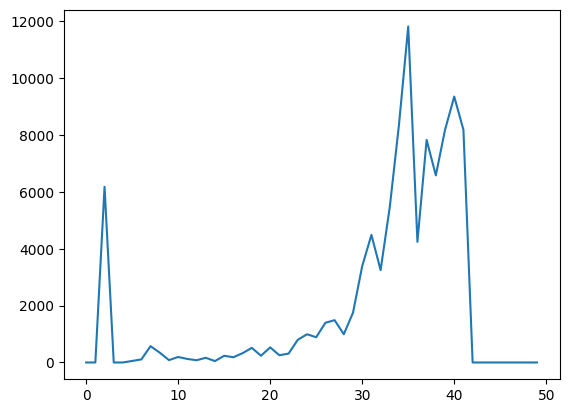

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(len(h)),h)
plt.show()

In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa


--2024-07-13 10:15:44--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.238.180.158, 18.238.180.106, 18.238.180.156, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.238.180.158|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2024-07-13 10:15:44 (624 MB/s) - ‘phix.fa’ saved [5528/5528]



[48.6, 535, 574, 569, 580, 562, 557, 563, 562, 577, 582, 547, 531, 572, 548, 546, 566, 587, 546, 548, 578, 588, 601, 594, 534, 553, 553, 577, 626, 565, 539, 579, 558, 593, 590, 578, 579, 567, 561, 599, 591, 575, 546, 549, 574, 547, 566, 593, 553, 578, 566, 579, 596, 578, 606, 576, 551, 590, 554, 568, 575, 565, 597, 539, 584, 577, 549, 581, 598, 578, 564, 553, 571, 551, 575, 548, 591, 579, 571, 572, 558, 602, 578, 582, 548, 583, 542, 570, 601, 593, 551, 594, 543, 607, 572, 598, 598, 536, 593, 561]


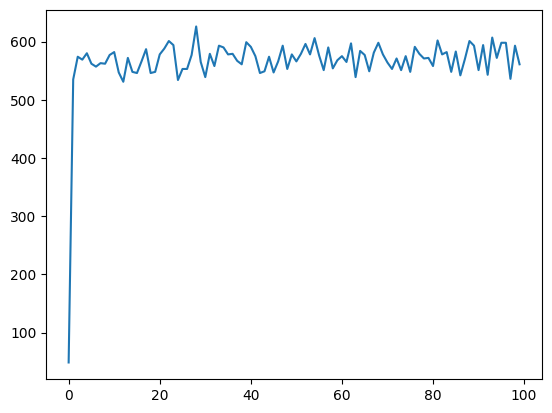

In [ ]:
def findGCByPos(reads):
  gc=[0]*100
  totals=[0]*100

  for read in reads:
    for i in range(len(read)):
      if read[i]=='C' or read[i]=='G':
        gc[i]+=1
      totals[i]+=1

  for i in range(len(gc)):
    if totals[i]>0:
      gc[i]=100*gc[i]/totals[i]
    return gc
gc=findGCByPos(seqs)
print(gc)

plt.plot(range(len(gc)),gc)
plt.show()

In [ ]:
import collections

count=collections.Counter()
for seq in seqs:
  count.update(seq)
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


In [ ]:
def readGenome(filename):
  genome=''
  with open(filename,'r') as f:
    for line in f:
      if not line[0]=='>':
        genome+=line.rstrip()
  return genome

In [ ]:
genome = readGenome('phix.fa')


In [ ]:
genome

'GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAAATTCGACCTATCCTTGCGCAGCTCGAGAAGCTCTTACTTTGCGACCTTTCGCCATCAACTAACGATTCTGTCAAAAACTGACGCGTTGGATGAGGAGAAGTGGCTTAATATGCTTGGCACGTTCGTCAAGGACTGGTTTAGATATGAGTCACATTTTGTTCATGGTAGAGATTCTCTTGTTGACATTTTAAAAGAGCGTGGATTACTATCTGAGTCCGATGCTGTTCAACCACTAATAGGTAAGAAATCATGAGTCAAGTTACTGAACAATCCGTACGTTTCCAGACCGCTTTGGCCTCTATTAAGCTCATTCAGGCTTCTGCCGTTTTGGATTTAACCGAAGATGATTTCGATTTTCTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCTTGCGTTTATGGTACGCTGGACTTTGTGGGATACCCTCGCTTTCCTGCTCCTGTTGAGTTTATTGCTGCCGTCATTGCTTATTATGTTCATCCCGTCAACATTCAAACGGCCTGTCTCATCATGGAAGGCGCTGAATTTACGGAAAACATTATTAATGGCGTCGAGCGTCCGGTTAAAGCCGCTGAATTGTTCGCGTTTACCTTGCGTGTACGCGCAGGAAACACTGACGTTCTTACTGACGCAGAAGAAAACGTGCGTCAAAAATTACGTGCGGAAGGAGTGATGTAATGTCTAAAGGTAAAAAACGTTCTGGCGCTCGCCCTGGTCGTCCGCAGCCGTTGCGAGGTACTAAAGGCAAGCGTAAAGGCGCTCGTCTTTGGTATGTAGGTGGTCAACAATTTTAATTGCAGGGGCTTCGGCCCCTTACTTGAGGATAAAT

In [ ]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
          occurrences.append(i)
    return occurrences

In [ ]:
t = 'AGCTTAGATAGC'
p = 'AG'
naive(p,t)

[0, 5, 9]

In [ ]:
import random
def generateReads(genome, numReads, readLen):
  reads=[]
  for _ in range(numReads):
    start=random.randint(0,len(genome)-readLen)
    reads.append(genome[start:start+readLen])
  return reads

In [ ]:
reads = generateReads(genome, 100, 100)

# Count how many reads match the genome exactly
numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, len(reads)))

100 / 100 reads matched the genome exactly!


In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq


--2024-07-13 10:16:12--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 143.204.154.225, 143.204.154.101, 143.204.154.167, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|143.204.154.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K  --.-KB/s    in 0.06s   

2024-07-13 10:16:12 (4.08 MB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



In [ ]:
def readFastq(filename):
  sequences=[]
  with open(filename) as fh:
    while True:
      fh.readline()
      seq=fh.readline().rstrip()
      fh.readline()
      fh.readline()
      if len(seq)==0:
        break
      sequences.append(seq)
  return sequences



In [ ]:
import collections
phix_reads=readFastq('ERR266411_1.first1000.fastq')
count=collections.Counter()
for read in phix_reads:
  count.update(read)
print(count)

Counter({'T': 30531, 'A': 28426, 'C': 21890, 'G': 19147, 'N': 6})


In [ ]:
numMatched=0
n=0
for r in phix_reads:
  matches=naive(r,genome)
  n+=1
  if len(matches)>0:
    numMatched+=1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))


7 / 1000 reads matched the genome exactly!


In [ ]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))


459 / 1000 reads matched the genome exactly!


In [ ]:
def reverseComplement(s):
  complement={'A':'T','G':'C','C':'G','T':'A'}
  t=''
  for base in s:
    t=complement[base]+t
  return t

In [ ]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[30:100]
    if 'N' in r:
      continue
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))


491 / 999 reads matched the genome exactly!


Homework Assignment
1. Question 1
How many times does  AGGT or its reverse complement (
ACCT occur in the lambda virus genome?  E.g. if
AGGT occurs 10 times and
ACCT occurs 12 times, you should report 22.

In [ ]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2024-07-13 10:16:33--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 143.204.154.225, 143.204.154.101, 143.204.154.167, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|143.204.154.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.03s   

2024-07-13 10:16:34 (1.70 MB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [ ]:
def readGenome(filename):
  genome=''
  with open(filename,'r') as f:
    for line in f:
      if not line[0]=='>':
        genome+=line.rstrip()
  return genome

In [ ]:
phix_genome=readGenome('lambda_virus.fa.1')

In [ ]:
phix_genome

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATA

In [ ]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
          occurrences.append(i)
    return occurrences

In [ ]:
occurrences = naive('AGGT', phix_genome)
len(occurrences)

150

In [ ]:
occurrences_1 = naive('ACCT', phix_genome)
len(occurrences_1)

156

In [ ]:
150+156

306

2. How many times does  TTAA or its reverse complement occur in the lambda virus genome?  
Hint:
TTAA and its reverse complement are equal, so remember not to double count.

In [ ]:
occurrences_2 = naive('TTAA', phix_genome)
len(occurrences_2)

195

3. What is the offset of the leftmost occurrence of  ACTAAGT or its reverse complement in the Lambda virus genome?  E.g. if the leftmost occurrence of
ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.

In [ ]:
# Function to read the genome from a file
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

# Function to find the reverse complement of a DNA sequence
def reverse_complement(seq):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return ''.join(complement[base] for base in reversed(seq))

# Function to perform naive exact matching
def naive(pattern, text):
    occurrences = []
    for i in range(len(text) - len(pattern) + 1):
        match = True
        for j in range(len(pattern)):
            if text[i + j] != pattern[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

# Function to count occurrences of a pattern and its reverse complement without double counting
def count_pattern_and_reverse_complement(genome, pattern):
    reverse_pattern = reverse_complement(pattern)
    occurrences = naive(pattern, genome)

    if pattern != reverse_pattern:
        occurrences += naive(reverse_pattern, genome)

    return len(occurrences)

# Download the lambda virus genome file
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

# Read the genome
lambda_virus_genome = readGenome('lambda_virus.fa')

# Pattern to search for
pattern = "TTAA"

# Count occurrences of pattern and its reverse complement
total_occurrences = count_pattern_and_reverse_complement(lambda_virus_genome, pattern)
print(total_occurrences)


--2024-07-13 10:17:00--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 3.161.210.49, 3.161.210.90, 3.161.210.66, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|3.161.210.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.2’

lambda_virus.fa.2   100%[===================>]  48.12K  --.-KB/s    in 0.03s   

2024-07-13 10:17:00 (1.45 MB/s) - ‘lambda_virus.fa.2’ saved [49270/49270]

195


In [ ]:
occurrences_4 = naive('ACTAAGT', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences_4))


offset of leftmost occurrence: 27733


In [ ]:
occurrences_5 = naive('ACTTAGT', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences_5))

offset of leftmost occurrence: 26028


4. What is the offset of the leftmost occurrence of
AGTCGA or its reverse complement in the Lambda virus genome?

In [ ]:
occurrences_6 = naive('AGTCGA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences_6))

offset of leftmost occurrence: 18005


In [ ]:
occurrences_7 = naive('TCGACT', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences_7))

offset of leftmost occurrence: 450


5. As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.
For Questions 5 and 6, make a new version of the
naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.

￼

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So  naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT') should return the list
[0, 4]
[0, 4].



How many times does
TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?

In [ ]:
def naive_2m(pattern,text):
  occurrences=[]
  for i in range(len(text)-len(pattern)+1):
    mismatches=0
    for j in range(len(pattern)):
      if text[i+j]!=pattern[j]:
        mismatches+=1
        if mismatches>2:
          break
    if mismatches<=2:
      occurrences.append(i)
  return occurrences



In [ ]:
print(len(naive_2m('TTCAAGCC',phix_genome)))

191


6. What is the offset of the leftmost occurrence of  AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [ ]:
occurrences_7 = naive_2m('AGGAGGTT', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences_7))

offset of leftmost occurrence: 49


7. Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human: https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:
Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.  This dataset has something wrong with it; one of the sequencing cycles is poor quality. Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [ ]:
!wget  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2024-07-13 10:18:02--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.230.209.99, 54.230.209.53, 54.230.209.231, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.230.209.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.04s   

2024-07-13 10:18:02 (5.25 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [ ]:
import numpy as np

# Function to read FASTQ file and extract quality scores
def read_fastq(filename):
    sequences = []
    qualities = []
    with open(filename, 'r') as f:
        while True:
            f.readline()  # Skip the read name line
            seq = f.readline().strip()  # Read the sequence line
            f.readline()  # Skip the plus line
            qual = f.readline().strip()  # Read the quality score line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

# Function to convert quality scores to numerical values
def phred33_to_q(qual):
    return [ord(char) - 33 for char in qual]

# Download the FASTQ file
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

# Read the FASTQ file
sequences, qualities = read_fastq('ERR037900_1.first1000.fastq')

# Convert all quality scores to numerical values
quality_scores = [phred33_to_q(qual) for qual in qualities]

# Transpose the list of quality scores to aggregate by position
quality_scores_by_position = np.transpose(quality_scores)

# Calculate the average quality score for each position
average_quality_scores = [np.mean(position) for position in quality_scores_by_position]

# Identify the position with the lowest average quality score
lowest_quality_position = np.argmin(average_quality_scores)
print(f"The sequencing cycle with the poorest quality is at position: {lowest_quality_position}")


--2024-07-13 10:18:03--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.230.209.99, 54.230.209.53, 54.230.209.231, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.230.209.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq.1’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.04s   

2024-07-13 10:18:03 (5.71 MB/s) - ‘ERR037900_1.first1000.fastq.1’ saved [241626/241626]

The sequencing cycle with the poorest quality is at position: 66


Python for Genomic Data Science


In [ ]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.1 MB/s eta 0:00:00


In [ ]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

# The unknown DNA sequence
sequence = """TGGGCCTCATATTTATCCTATATACCATGTTCGTATGGTGGCGCGATGTTCTACGTGAATCCACGTTCGAAGGACATCATACCAAAGTCGTACA
AATTAGGACCTCGATATGGTTTTATTCTGTTTATCGTATCGGAGGTTATGTTCTTTTTTGCTCTTTTTCGGGCTTCTTCTCATTCTTCTTTGGCACC
TACGGTAGAG"""

# Perform BLAST search
result_handle = NCBIWWW.qblast("blastn", "nt", sequence)

# Save the results to a file
with open("my_blast.xml", "w") as out_handle:
    out_handle.write(result_handle.read())

# Parse the BLAST results
with open("my_blast.xml") as result_handle:
    blast_record = NCBIXML.read(result_handle)

# Print the best match
if blast_record.alignments:
    top_alignment = blast_record.alignments[0]
    top_hsp = top_alignment.hsps[0]
    print("****Alignment****")
    print("sequence:", top_alignment.title)
    print("length:", top_alignment.length)
    print("e value:", top_hsp.expect)
    print("score:", top_hsp.score)
    print("gaps:", top_hsp.gaps)
    print("identity:", top_hsp.identities)
else:
    print("No hits found")


****Alignment****
sequence: gi|1783584753|gb|MN651324.1| Nicotiana tabacum strain zhongyan90 cytoplasmic male sterility(CMS) line cultivar MSzhongyan90 mitochondrion, complete genome
length: 530869
e value: 4.76886e-93
score: 393.0
gaps: 1
identity: 200


In [ ]:
from Bio.Seq import Seq
seq="""TGGGCCTCATATTTATCCTATATACCATGTTCGTATGGTGGCGCGATGTTCTACGTGAATCCACGTTCGAAGGACATCATACCAAAGTCGTAC
AATTAGGACCTCGATATGGTTTTATTCTGTTTATCGTATCGGAGGTTATGTTCTTTTTTGCTCTTTTTCGGGCTTCTTCTCATTCTTCTTTGGCAC
CTACGGTAGAG"""
dna_sequence=seq.replace('\n','')
dna_seq=Seq(dna_sequence)
protein_seq=dna_seq.translate()
print(protein_seq)

WASYLSYIPCSYGGAMFYVNPRSKDIIPKSYN*DLDMVLFCLSYRRLCSFLLFFGLLLILLWHLR*


/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Question 1

Please run the following data set in the program(s) that you have written:
dna2.fasta

If you created your program(s) correctly, you will be able to answer the questions below.

How many records are in the multi-FASTA file?

In [ ]:
from Bio import SeqIO
def count_fasta_records(file_path):
  count=0
  with open(file_path,'r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):
      count+=1
  return count


file_path = "dna2.fasta"  # Replace this with the path to your actual file
num_records = count_fasta_records(file_path)
print(f"The number of records in the file is: {num_records}")


The number of records in the file is: 18


Question2: What is the length of the longest sequence in the file?

In [ ]:
from Bio import Seq

def count_fasta_records(file_path):
  count=0
  with open(file_path,'r') as handle:
    for record in SeqIO.parse(handle,'fasta'):
      count+=1
  return count



def find_longest_sequence(file_path):
  max_length=0
  longest_sequence_id=""
  with open(file_path,'r') as handle:
    for record in SeqIO.parse(handle,'fasta'):
      sequence_length=len(record.seq)
      if sequence_length>max_length:
        max_length=sequence_length
        longest_sequence_id=record.id
  return max_length, longest_sequence_id
file_path = "dna2.fasta"

# Count the number of records
num_records = count_fasta_records(file_path)
print(f"The number of records in the file is: {num_records}")

# Find the longest sequence
longest_sequence_length, longest_sequence_id = find_longest_sequence(file_path)
print(f"The length of the longest sequence in the file is: {longest_sequence_length}")
print(f"The ID of the longest sequence is: {longest_sequence_id}")

The number of records in the file is: 18
The length of the longest sequence in the file is: 4894
The ID of the longest sequence is: gi|142022655|gb|EQ086233.1|255


Question3: What is the length of the shortest sequence in the file?



In [ ]:
from Bio import SeqIO

def count_fasta_records(file_path):
    count = 0
    with open(file_path, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            count += 1
    return count

def find_longest_sequence(file_path):
    max_length = 0
    longest_sequence_id = ""
    with open(file_path, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            sequence_length = len(record.seq)
            if sequence_length > max_length:
                max_length = sequence_length
                longest_sequence_id = record.id
    return max_length, longest_sequence_id

def find_shortest_sequence(file_path):
    min_length = float('inf')
    shortest_sequence_id = ""
    with open(file_path, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            sequence_length = len(record.seq)
            if sequence_length < min_length:
                min_length = sequence_length
                shortest_sequence_id = record.id
    return min_length, shortest_sequence_id

# Test the functions with the example file
file_path = "dna2.fasta"  # Replace this with the path to your actual file

# Count the number of records
num_records = count_fasta_records(file_path)
print(f"The number of records in the file is: {num_records}")

# Find the longest sequence
longest_sequence_length, longest_sequence_id = find_longest_sequence(file_path)
print(f"The length of the longest sequence in the file is: {longest_sequence_length}")
print(f"The ID of the longest sequence is: {longest_sequence_id}")

# Find the shortest sequence
shortest_sequence_length, shortest_sequence_id = find_shortest_sequence(file_path)
print(f"The length of the shortest sequence in the file is: {shortest_sequence_length}")
print(f"The ID of the shortest sequence is: {shortest_sequence_id}")


The number of records in the file is: 18
The length of the longest sequence in the file is: 4894
The ID of the longest sequence is: gi|142022655|gb|EQ086233.1|255
The length of the shortest sequence in the file is: 115
The ID of the shortest sequence is: gi|142022655|gb|EQ086233.1|346


Question 4: What is the length of the longest ORF appearing in reading frame 2 of any of the sequences?



In [ ]:
from Bio import Seq
from Bio.Seq import Seq


def find_longest_orf(file_path):
  longest_orf_length=0
  longest_orf_sequence=""
  longest_orf_id=""

  with open(file_path,"r") as handle:
    for record in SeqIO.parse(handle,"fasta"):
      sequence=record.seq
      frame2_seq=sequence[1:]

      orfs=[]
      start_codon="ATG"
      stop_codons=["TAA","TGA","TAG"]
      for i in range(0,len(frame2_seq)-2,3):
        codon=frame2_seq[i:i+3]
        if codon==start_codon:
          for j in range(i,len(frame2_seq)-2,3):
            stop_codon=frame2_seq[j:j+3]
            if stop_codon in stop_codons:
              orf_length=j-i+3
              orfs.append((orf_length, frame2_seq[i:j+3], i))
              break

      for orf in orfs:
        if orf[0]>longest_orf_length:
          longest_orf_length=orf[0]
          longest_orf_sequence = orf[1]
          longest_orf_id = record.id
  return longest_orf_length, longest_orf_id

file_path = "dna2.fasta"
longest_orf_length, longest_orf_id = find_longest_orf(file_path)
print(f"The length of the longest ORF in reading frame 2 is: {longest_orf_length}")
print(f"The ID of the sequence containing the longest ORF is: {longest_orf_id}")













The length of the longest ORF in reading frame 2 is: 1458
The ID of the sequence containing the longest ORF is: gi|142022655|gb|EQ086233.1|16


Question 5: What is the starting position of the longest ORF in reading frame 3 in any of the sequences? The position should indicate the character number where the ORF begins. For instance, the following ORF:

In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq

def find_longest_orf_frame3(file_path):
    longest_orf_length = 0
    longest_orf_start = -1
    longest_orf_id = ""

    with open(file_path, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            sequence = record.seq
            frame3_seq = sequence[2:]  # reading frame 3 starts at the third nucleotide

            # Find all ORFs in reading frame 3
            orfs = []
            start_codon = "ATG"
            stop_codons = ["TAA", "TAG", "TGA"]
            for i in range(0, len(frame3_seq)-2, 3):
                codon = frame3_seq[i:i+3]
                if codon == start_codon:
                    for j in range(i, len(frame3_seq)-2, 3):
                        stop_codon = frame3_seq[j:j+3]
                        if stop_codon in stop_codons:
                            orf_length = j - i + 3
                            orfs.append((orf_length, i + 2))  # i + 2 to adjust for frame 3 offset
                            break

            # Find the longest ORF
            for orf in orfs:
                if orf[0] > longest_orf_length:
                    longest_orf_length = orf[0]
                    longest_orf_start = orf[1]
                    longest_orf_id = record.id

    return longest_orf_start, longest_orf_id

# Test the function with the example file
file_path = "dna2.fasta"
longest_orf_start, longest_orf_id = find_longest_orf_frame3(file_path)
print(f"The starting position of the longest ORF in reading frame 3 is: {longest_orf_start + 1}")  # +1 to convert to 1-based indexing
print(f"The ID of the sequence containing the longest ORF is: {longest_orf_id}")


The starting position of the longest ORF in reading frame 3 is: 636
The ID of the sequence containing the longest ORF is: gi|142022655|gb|EQ086233.1|527


Question 6: What is the length of the longest ORF appearing in any sequence and in any forward reading frame?

In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq

def find_longest_orf_any_frame(file_path):
    longest_orf_length = 0
    longest_orf_id = ""
    longest_orf_start = -1
    longest_orf_frame = -1

    with open(file_path, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            sequence = record.seq
            seq_id = record.id

            for frame in range(3):  # Check frames 0 (1), 1 (2), and 2 (3)
                frame_seq = sequence[frame:]
                orfs = []
                start_codon = "ATG"
                stop_codons = ["TAA", "TAG", "TGA"]

                for i in range(0, len(frame_seq)-2, 3):
                    codon = frame_seq[i:i+3]
                    if codon == start_codon:
                        for j in range(i, len(frame_seq)-2, 3):
                            stop_codon = frame_seq[j:j+3]
                            if stop_codon in stop_codons:
                                orf_length = j - i + 3
                                orfs.append((orf_length, i + frame))
                                break

                for orf in orfs:
                    if orf[0] > longest_orf_length:
                        longest_orf_length = orf[0]
                        longest_orf_start = orf[1]
                        longest_orf_id = seq_id
                        longest_orf_frame = frame + 1  # Frame 1, 2, or 3

    return longest_orf_length, longest_orf_id, longest_orf_start, longest_orf_frame

# Test the function with the example file
file_path = "dna2.fasta"
longest_orf_length, longest_orf_id, longest_orf_start, longest_orf_frame = find_longest_orf_any_frame(file_path)
print(f"The length of the longest ORF is: {longest_orf_length}")
print(f"The ID of the sequence containing the longest ORF is: {longest_orf_id}")
print(f"The starting position of the longest ORF is: {longest_orf_start + 1}")  # +1 to convert to 1-based indexing
print(f"The reading frame of the longest ORF is: {longest_orf_frame}")


The length of the longest ORF is: 2394
The ID of the sequence containing the longest ORF is: gi|142022655|gb|EQ086233.1|45
The starting position of the longest ORF is: 385
The reading frame of the longest ORF is: 1


Question 7: What is the length of the longest forward ORF that appears in the sequence with the identifier  gi|142022655|gb|EQ086233.1|16?



In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq

def find_longest_orf_in_sequence(file_path, target_id):
    longest_orf_length = 0
    longest_orf_start = -1

    with open(file_path, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            if record.id == target_id:
                sequence = record.seq

                for frame in range(3):  # Check frames 0 (1), 1 (2), and 2 (3)
                    frame_seq = sequence[frame:]
                    orfs = []
                    start_codon = "ATG"
                    stop_codons = ["TAA", "TAG", "TGA"]

                    for i in range(0, len(frame_seq)-2, 3):
                        codon = frame_seq[i:i+3]
                        if codon == start_codon:
                            for j in range(i, len(frame_seq)-2, 3):
                                stop_codon = frame_seq[j:j+3]
                                if stop_codon in stop_codons:
                                    orf_length = j - i + 3
                                    orfs.append((orf_length, i + frame))
                                    break

                    for orf in orfs:
                        if orf[0] > longest_orf_length:
                            longest_orf_length = orf[0]
                            longest_orf_start = orf[1]

    return longest_orf_length, longest_orf_start

# Test the function with the example file and target ID
file_path = "dna2.fasta"
target_id = "gi|142022655|gb|EQ086233.1|16"
longest_orf_length, longest_orf_start = find_longest_orf_in_sequence(file_path, target_id)
print(f"The length of the longest forward ORF in the sequence with ID {target_id} is: {longest_orf_length}")
print(f"The starting position of the longest ORF is: {longest_orf_start + 1}")  # +1 to convert to 1-based indexing


The length of the longest forward ORF in the sequence with ID gi|142022655|gb|EQ086233.1|16 is: 1644
The starting position of the longest ORF is: 1440


Question 8: Find the most frequently occurring repeat of length 6 in all sequences. How many times does it occur in all?



In [ ]:
from Bio import SeqIO
from collections import defaultdict

def find_most_frequent_repeat(file_path, repeat_length):
    repeat_counts = defaultdict(int)

    with open(file_path, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            sequence = str(record.seq)
            for i in range(len(sequence) - repeat_length + 1):
                repeat = sequence[i:i + repeat_length]
                repeat_counts[repeat] += 1

    most_frequent_repeat = max(repeat_counts, key=repeat_counts.get)
    most_frequent_count = repeat_counts[most_frequent_repeat]

    return most_frequent_repeat, most_frequent_count

# Test the function with the example file
file_path = "dna2.fasta"
repeat_length = 6
most_frequent_repeat, most_frequent_count = find_most_frequent_repeat(file_path, repeat_length)
print(f"The most frequently occurring repeat of length {repeat_length} is: {most_frequent_repeat}")
print(f"It occurs {most_frequent_count} times in all sequences.")


The most frequently occurring repeat of length 6 is: GCGCGC
It occurs 153 times in all sequences.


Question 9: Find all repeats of length 12 in the input file. Let's use Max to specify the number of copies

of the most frequent repeat of length 12.  How many different 12-base sequences

occur Max times?

In [ ]:
from Bio import SeqIO
from collections import defaultdict

def find_repeats_and_max_occurrences(file_path, repeat_length):
    repeat_counts = defaultdict(int)

    with open(file_path, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            sequence = str(record.seq)
            for i in range(len(sequence) - repeat_length + 1):
                repeat = sequence[i:i + repeat_length]
                repeat_counts[repeat] += 1

    max_occurrences = max(repeat_counts.values())
    most_frequent_repeats = [repeat for repeat, count in repeat_counts.items() if count == max_occurrences]

    return most_frequent_repeats, max_occurrences

# Test the function with the example file
file_path = "dna2.fasta"
repeat_length = 12
most_frequent_repeats, max_occurrences = find_repeats_and_max_occurrences(file_path, repeat_length)
print(f"The number of different 12-base sequences that occur {max_occurrences} times is: {len(most_frequent_repeats)}")


The number of different 12-base sequences that occur 10 times is: 4


Question 10: Which one of the following repeats of length 7 has a maximum number of occurrences?



In [ ]:
from Bio import SeqIO
from collections import defaultdict

def find_most_frequent_repeat(file_path, repeat_length):
    repeat_counts = defaultdict(int)

    with open(file_path, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            sequence = str(record.seq)
            for i in range(len(sequence) - repeat_length + 1):
                repeat = sequence[i:i + repeat_length]
                repeat_counts[repeat] += 1

    most_frequent_repeat = max(repeat_counts, key=repeat_counts.get)
    most_frequent_count = repeat_counts[most_frequent_repeat]

    return most_frequent_repeat, most_frequent_count

# Test the function with the example file
file_path = "dna2.fasta"
repeat_length = 7
most_frequent_repeat, most_frequent_count = find_most_frequent_repeat(file_path, repeat_length)
print(f"The most frequently occurring repeat of length {repeat_length} is: {most_frequent_repeat}")
print(f"It occurs {most_frequent_count} times in all sequences.")


The most frequently occurring repeat of length 7 is: CGCGCCG
It occurs 63 times in all sequences.


BOOYER MOORE

In [1]:
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s) - 1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i - 1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i - k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r + 1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z

def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]

def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p) - 1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp

def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i - 1], lp[i])
    return l

def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i + 1:  # prefix matching a suffix
            small_lp[len(n) - i - 1] = i + 1
    for i in range(len(n) - 2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i + 1]
    return small_lp

def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)

def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]

def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]

def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i + 1
    return tab

class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """

    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)

    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci] - 1)
        return i - (self.bad_char[i][ci] - 1)

    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]

    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]


In [2]:
# GCTAGCTCTACGAGTCTA
p = 'TCAA'
p_bm = BoyerMoore(p, alphabet='ACGT')
p_bm.bad_character_rule(2, 'T')

2

In [3]:
# GCTAGCTCTACGAGTCTA
# ACTA
p = 'ACTA'
p_bm = BoyerMoore(p, alphabet='ACGT')
p_bm.good_suffix_rule(0)

3

In [4]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

In [5]:
t = 'GCTAGCTCTACGAGTCTA'
p = 'TCTA'
p_bm = BoyerMoore(p, alphabet='ACGT')

In [6]:
boyer_moore(p, p_bm, t)


[6, 14]

In [7]:
def create_bad_char_table(pattern, alphabet):
    bad_char_table = {}
    for i, char in enumerate(pattern):
        bad_char_table[char] = i
    return bad_char_table

def bad_character_rule(bad_char_table, mismatch_index, mismatched_char):
    if mismatched_char in bad_char_table:
        return max(1, mismatch_index - bad_char_table[mismatched_char])
    else:
        return mismatch_index + 1


k-mer indexing

In [8]:
import bisect
import sys

In [9]:
class Index(object):
    def __init__(self, t, k):
        ''' Create index from all substrings of size 'length' '''
        self.k = k  # k-mer length (k)
        self.index = []
        for i in range(len(t) - k + 1):  # for each k-mer
            self.index.append((t[i:i+k], i))  # add (k-mer, offset) pair
        self.index.sort()  # alphabetize by k-mer

    def query(self, p):
        ''' Return index hits for first k-mer of P '''
        kmer = p[:self.k]  # query with first k-mer
        i = bisect.bisect_left(self.index, (kmer, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != kmer:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [10]:
def queryIndex(p, t, index):
    k = index.k
    offsets = []
    for i in index.query(p):
        if p[k:] == t[i+k:i+len(p)]:  # verify that rest of P matches
            offsets.append(i)
    return offsets

In [11]:
t = 'ACTTGGAGATCTTTGAGGCTAGGTATTCGGGATCGAAGCTCATTTCGGGGATCGATTACGATATGGTGGGTATTCGGGA'
p = 'GGTATTCGGGA'

In [12]:
index = Index(t, 4)
print(queryIndex(p, t, index))

[21, 68]


In [15]:
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """

    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)

    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)

    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]

    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [16]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

In [17]:
def approximate_match(p, t, n):
    segment_length = int(round(len(p) / (n+1)))
    all_matches = set()
    for i in range(n+1):
        start = i*segment_length
        end = min((i+1)*segment_length, len(p))
        p_bm = BoyerMoore(p[start:end], alphabet='ACGT')
        matches = boyer_moore(p[start:end], p_bm, t)
        # Extend matching segments to see if whole p matches
        for m in matches:
            if m < start or m-start+len(p) > len(t):
                continue
            mismatches = 0
            for j in range(0, start):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
            for j in range(end, len(p)):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
            if mismatches <= n:
                all_matches.add(m - start)
    return list(all_matches)

In [18]:
p = 'AACTTG'
t = 'CACTTAATTTG'
print(approximate_match(p, t, 2))

[0, 5]


**Programming Homework 2**


In [19]:
# Importing the necessary library
import urllib.request

# Specifying the URL
url = "http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta"

# Specifying the file name to save the downloaded file
file = "chr1.GRCh38.excerpt.fasta"

# Downloading the file
urllib.request.urlretrieve(url, file)

print(f"File '{file}' downloaded successfully!")


File 'chr1.GRCh38.excerpt.fasta' downloaded successfully!


Build a class of Boyer-Moore algorithm to index the pattern


In [20]:
import unittest


def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)

    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break

    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1

    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """

    def __init__(self, p, alphabet='ACGT'):
        # Create map from alphabet characters to integers
        self.amap = {alphabet[i]: i for i in range(len(alphabet))}
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)

    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        assert i < len(self.bad_char)
        ci = self.amap[c]
        return i - (self.bad_char[i][ci]-1)

    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]

    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]


class TestBoyerMoorePreproc(unittest.TestCase):

    def test_z_1(self):
        s = 'abb'
        #    -00
        z = z_array(s)
        self.assertEqual([3, 0, 0], z)

    def test_z_2(self):
        s = 'abababab'
        #    00604020
        z = z_array(s)
        self.assertEqual([8, 0, 6, 0, 4, 0, 2, 0], z)

    def test_z_3(self):
        s = 'abababab'
        #    00604020
        z = z_array(s)
        self.assertEqual([8, 0, 6, 0, 4, 0, 2, 0], z)

    def test_n_1(self):
        s = 'abb'
        #    01-
        n = n_array(s)
        self.assertEqual([0, 1, 3], n)

    def test_n_2(self):
        s = 'abracadabra'
        #    1004010100-
        n = n_array(s)
        self.assertEqual([1, 0, 0, 4, 0, 1, 0, 1, 0, 0, 11], n)

    def test_n_3(self):
        s = 'abababab'
        #    0204060-
        n = n_array(s)
        self.assertEqual([0, 2, 0, 4, 0, 6, 0, 8], n)

    def test_big_l_prime_1(self):
        s = 'abb'
        #    001
        big_l_prime = big_l_prime_array(s, n_array(s))
        self.assertEqual([0, 0, 2], big_l_prime)

    def test_big_l_prime_2(self):
        s = 'abracadabra'
        #    01234567890
        # L' 00000003007
        # L  00000003337
        big_l_prime = big_l_prime_array(s, n_array(s))
        self.assertEqual([0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 8], big_l_prime)

    def test_small_l_prime_1(self):
        s = 'abracadabra'
        # N  1004010100-
        # l'           1
        # l'        4
        # l' 44444444111
        small_l_prime = small_l_prime_array(n_array(s))
        self.assertEqual([11, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1], small_l_prime)

    def test_good_suffix_match_mismatch_1(self):
        p = 'GGTAGGT'
        big_l_prime, big_l, small_l_prime = good_suffix_table(p)
        self.assertEqual([0, 0, 0, 0, 3, 0, 0], big_l_prime)
        self.assertEqual([0, 0, 0, 0, 3, 3, 3], big_l)
        self.assertEqual([7, 3, 3, 3, 3, 0, 0], small_l_prime)
        self.assertEqual(0, good_suffix_mismatch(6, big_l_prime, small_l_prime))
        self.assertEqual(0, good_suffix_mismatch(6, big_l, small_l_prime))
        #  t:      xT
        #  p: GGTAGGT
        # L': -000300
        #  L: -000333
        self.assertEqual(7, good_suffix_mismatch(5, big_l_prime, small_l_prime))
        self.assertEqual(4, good_suffix_mismatch(5, big_l, small_l_prime))
        #  t:     xGT
        #  p: GGTAGGT
        # L': -000300
        #  L: -000333
        self.assertEqual(7, good_suffix_mismatch(4, big_l_prime, small_l_prime))
        self.assertEqual(4, good_suffix_mismatch(4, big_l, small_l_prime))
        #  t:    xGGT
        #  p: GGTAGGT
        # L': -000300
        #  L: -000333
        self.assertEqual(4, good_suffix_mismatch(3, big_l_prime, small_l_prime))
        self.assertEqual(4, good_suffix_mismatch(3, big_l, small_l_prime))
        #  t:   xAGGT
        #  p: GGTAGGT
        # L': -000300
        #  L: -000333
        self.assertEqual(4, good_suffix_mismatch(2, big_l_prime, small_l_prime))
        self.assertEqual(4, good_suffix_mismatch(2, big_l, small_l_prime))
        #  t:  xTAGGT
        #  p: GGTAGGT
        # L': -000300
        #  L: -000333
        self.assertEqual(4, good_suffix_mismatch(1, big_l_prime, small_l_prime))
        self.assertEqual(4, good_suffix_mismatch(1, big_l, small_l_prime))
        #  t: xGTAGGT
        #  p: GGTAGGT
        # L': -000300
        #  L: -000333
        self.assertEqual(4, good_suffix_mismatch(0, big_l_prime, small_l_prime))
        self.assertEqual(4, good_suffix_mismatch(0, big_l, small_l_prime))

    def test_good_suffix_table_1(self):
        s = 'abb'
        #    001
        big_l_prime, big_l, small_l_prime = good_suffix_table(s)
        self.assertEqual([0, 0, 2], big_l_prime)
        self.assertEqual([0, 0, 2], big_l)
        self.assertEqual([3, 0, 0], small_l_prime)

    def test_good_suffix_table_2(self):
        s = 'abracadabra'
        #    01234567890
        # L' 00000003007
        # L  00000003337
        # l' -4444444111
        big_l_prime, big_l, small_l_prime = good_suffix_table(s)
        self.assertEqual([0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 8], big_l_prime)
        self.assertEqual([0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 8], big_l)
        self.assertEqual([11, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1], small_l_prime)

Boyer-Moore Function


In [21]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching. p=pattern, t=text,
        p_bm=BoyerMoore object for p """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

In [22]:
def loadFasta(filename):
    f = open(filename)
    name = ''
    dna = ''

    for line in f:
        if line[0] == '>':
            name = line[1:].rstrip()

        else:
            dna += line.rstrip()
    return name, dna

**Measuring Boyer-Moore's benefit. First, **download the Python module for Boyer-Moore preprocessing:

http://d28rh4a8wq0iu5.cloudfront.net/ads1/code/bm_preproc.py

This module provides the BoyerMoore class, which encapsulates the preprocessing info used by the boyer_moore function above. Second, download the provided excerpt of human chromosome 1:

http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta

Third, implement versions of the naive exact matching and Boyer-Moore algorithms that additionally count and return (a) the number of character comparisons performed and (b) the number of alignments tried. Roughly speaking, these measure how much work the two different algorithms are doing.

For a few examples to help you test if your enhanced versions of the naive exact matching and Boyer-Moore algorithms are working properly, see these notebooks:

Naive Boyer-Moore

Question 1
How many alignments does the naive exact matching algorithm try when matching the string GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG (derived from human Alu sequences) to the excerpt of human chromosome 1? (Don't consider reverse complements.) Answer for Question 1 You entered:

In [23]:
def naive_alignment(p, t):
    appearance = []
    alignment = 0

    for i in range(len(t) - len(p) + 1):
        alignment += 1
        for j in range(len(p)):
            match = True
            if t[i + j] != p[j]:
                match = False
                break
        if match == True:
            appearance.append(i)

    return appearance, alignment

In [25]:
file = 'chr1.GRCh38.excerpt.fasta'
chromosome_name, chromosome_dna = loadFasta(file)
alu = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
naive_alignment(alu, chromosome_dna)


([56922], 799954)

Question 2
How many character comparisons does the naive exact matching algorithm try when matching the string GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG (derived from human Alu sequences) to the excerpt of human chromosome 1? (Don't consider reverse complements.)

In [26]:
def naive_comparison(p, t):
    appearance = []
    comparison = 0

    for i in range(len(t) - len(p) + 1):
        for j in range(len(p)):
            comparison += 1
            match = True
            if t[i + j] != p[j]:
                match = False
                break
        if match == True:
            appearance.append(i)

    return appearance, comparison


naive_comparison(alu, chromosome_dna)


([56922], 984143)

Question 3
How many alignments does Boyer-Moore try when matching the string GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG (derived from human Alu sequences) to the excerpt of human chromosome 1? (Don't consider reverse complements.)

In [27]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching. p=pattern, t=text,
        p_bm=BoyerMoore object for p """
    i = 0
    occurrences = []
    alignment = 0
    while i < len(t) - len(p) + 1:
        alignment +=1
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences, alignment





alu_bm = BoyerMoore(alu)
boyer_moore(alu, alu_bm, chromosome_dna)

([56922], 127974)

Question 4
Index-assisted approximate matching. In practicals, we built a Python class called Index implementing an ordered-list version of the k-mer index. The Index class is copied below.

In [28]:
import bisect


class Index(object):
    """ Holds a substring index for a text T """

    def __init__(self, t, k):
        """ Create index from all substrings of t of length k """
        self.k = k  # k-mer length (k)
        self.index = []
        for i in range(len(t) - k + 1):  # for each k-mer
            self.index.append((t[i:i+k], i))  # add (k-mer, offset) pair
        self.index.sort()  # alphabetize by k-mer !!!!!! Attention, remember this sorting step!!!!

    def query(self, p):
        """ Return index hits for first k-mer of p """
        kmer = p[:self.k]  # query with first k-mer
        i = bisect.bisect_left(self.index, (kmer, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != kmer:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [29]:
def index_approximate_match(p, t, t_index, n):
        segment_length = int(len(p) / (n + 1))
        hits = []
        all_match =set() # We use set to unique the repetitive items.
        for c in range(n + 1):
            start = c * segment_length
            end = (c + 1) * segment_length
            segment = p[start:end]

            i = bisect.bisect_left(t_index.index, (segment, -1))

            while i < len(t_index.index):
                if segment != t_index.index[i][0]:
                    break
                else:
                    t_offset = t_index.index[i][1]
                    hits.append(t_offset)
                i += 1

            for h in hits:
                if start > h or h-start+len(p) > len(t):
                    continue

                mismatch = 0
                for x in range(0, start):
                    if p[x] != t[h-start+x]:
                        mismatch += 1
                    if mismatch > n:
                        break

                for y in range(end, len(p)):
                    if p[y] != t[h-start+y]:
                        mismatch += 1
                    if mismatch > n:
                        break

                if mismatch <=n:
                    all_match.add(h-start) # We use set to unique the repetitive items.

        return hits, list(all_match)

In [30]:
chromosome_dna_index = Index(chromosome_dna, 8)


We also implemented the pigeonhole principle using Boyer-Moore as our exact matching algorithm.

Implement the pigeonhole principle using Index to find exact matches for the partitions. Assume P always has length 24, and that we are looking for approximate matches with up to 2 mismatches (substitutions). We will use an 8-mer index.

Download the Python module for building a k-mer index.

https://d28rh4a8wq0iu5.cloudfront.net/ads1/code/kmer_index.py

Write a function that, given a length-24 pattern P and given an Index object built on 8-mers, finds all approximate occurrences of P within T with up to 2 mismatches. Insertions and deletions are not allowed. Don't consider any reverse complements.

How many times does the string GGCGCGGTGGCTCACGCCTGTAAT, which is derived from a human Alu sequence, occur with up to 2 substitutions in the excerpt of human chromosome 1? (Don't consider reverse complements here.)

Hint 1: Multiple index hits might direct you to the same match multiple times, but be careful not to count a match more than once.

Hint 2: You can check your work by comparing the output of your new function to that of the naive_2mm function implemented in the previous module.

In [31]:
p = 'GGCGCGGTGGCTCACGCCTGTAAT'
hits, matches = index_approximate_match(p, chromosome_dna, chromosome_dna_index, 2)
len(matches)


19

Using the instructions given in Question 4, how many total index hits are there when searching for occurrences of
GGCGCGGTGGCTCACGCCTGTAAT
GGCGCGGTGGCTCACGCCTGTAAT with up to 2 substitutions in the excerpt of human chromosome 1?

  (Don't consider reverse complements.)

Hint: You should be able to use the
boyer_moore
boyer_moore function (or the slower
naive
naive function) to double-check your answer.

In [32]:
len(hits)


90

Question 6
Let's examine whether there is a benefit to using an index built using subsequences of T rather than substrings, as we discussed in the "Variations on k-mer indexes" video.  We'll consider subsequences involving every N characters.  For example, if we split
ATATAT
ATATAT into two substring partitions, we would get partitions
ATA
ATA (the first half) and
TAT
TAT (second half).  But if we split
ATATAT
ATATAT into two  subsequences  by taking every other character, we would get
AAA
AAA (first, third and fifth characters) and
TTT
TTT (second, fourth and sixth).

Another way to visualize this is using numbers to show how each character of P is allocated to a partition.  Splitting a length-6 pattern into two substrings could be represented as
111222
111222, and splitting into two subsequences of every other character could be represented as
121212
121212

The following class
SubseqIndex
SubseqIndex is a more general implementation of
Index
Index that additionally handles subsequences. It only considers subsequences that take every Nth character:

In [33]:
class SubseqIndex(object):
    """ Holds a subsequence index for a text T """

    def __init__(self, t, k, ival):
        """ Create index from all subsequences consisting of k characters
            spaced ival positions apart.  E.g., SubseqIndex("ATAT", 2, 2)
            extracts ("AA", 0) and ("TT", 1). """
        self.k = k  # num characters per subsequence extracted
        self.ival = ival  # space between them; 1=adjacent, 2=every other, etc
        self.index = []
        self.span = 1 + ival * (k - 1)
        for i in range(len(t) - self.span + 1):  # for each subseq
            self.index.append((t[i:i+self.span:ival], i))  # add (subseq, offset)
        self.index.sort()  # alphabetize by subseq

    def query(self, p):
        """ Return index hits for first subseq of p """
        subseq = p[:self.span:self.ival]  # query with first subseq
        i = bisect.bisect_left(self.index, (subseq, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != subseq:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [34]:
t_subseq_index = SubseqIndex(chromosome_dna, 8, 3)
len(t_subseq_index.query(p))

35

In [35]:
def index_approximate_subseq_match(p, t, t_subseq_index, n):
    hits = []
    for position in range(3):
        subseq = p[position:][:22:3]

        i = bisect.bisect_left(t_subseq_index.index, (subseq, -1))  # binary search

        while i < len(t_subseq_index.index):  # collect matching index entries
            if t_subseq_index.index[i][0] != subseq:
                break
            hits.append(t_subseq_index.index[i][1])
            i += 1

    return hits

In [37]:


hits = index_approximate_subseq_match(p, chromosome_dna, t_subseq_index, 2)
len(hits)

79

In [1]:
def editDistRecursive(x, y):
    # This implementation is very slow
    if len(x) == 0:
        return len(y)
    elif len(y) == 0:
        return len(x)
    else:
        distHor = editDistRecursive(x[:-1], y) + 1
        distVer = editDistRecursive(x, y[:-1]) + 1
        if x[-1] == y[-1]:
            distDiag = editDistRecursive(x[:-1], y[:-1])
        else:
            distDiag = editDistRecursive(x[:-1], y[:-1]) + 1
        return min(distHor, distVer, distDiag)

In [2]:
def editDistance(x, y):
    # Create distance matrix
    D = []
    for i in range(len(x)+1):
        D.append([0]*(len(y)+1))
    # Initialize first row and column of matrix
    for i in range(len(x)+1):
        D[i][0] = i
    for i in range(len(y)+1):
        D[0][i] = i
    # Fill in the rest of the matrix
    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + 1
            distVer = D[i-1][j] + 1
            if x[i-1] == y[j-1]:
                distDiag = D[i-1][j-1]
            else:
                distDiag = D[i-1][j-1] + 1
            D[i][j] = min(distHor, distVer, distDiag)
    # Edit distance is the value in the bottom right corner of the matrix
    return D[-1][-1]

In [3]:
x = 'shake spea'
y = 'Shakespear'
editDistance(x, y)

3

In [4]:
x = 'shake spea'
y = 'Shakespear'
editDistRecursive(x, y)

3

Global and Local Alignment

In [5]:
alphabet = ['A', 'C', 'G', 'T']
score = [[0, 4, 2, 4, 8],
         [4, 0, 4, 2, 8],
         [2, 4, 0, 4, 8],
         [4, 2, 4, 0, 8],
         [8, 8, 8, 8, 8]]

In [6]:
score[alphabet.index('A')][alphabet.index('T')]

4

In [7]:
score[alphabet.index('C')][-1]


8

In [8]:

def globalAlignment(x, y):
    # Create distance matrix
    D = []
    for i in range(len(x)+1):
        D.append([0] * (len(y)+1))

    # Initialize first column
    for i in range(1, len(x)+1):
        D[i][0] = D[i-1][0] + score[alphabet.index(x[i-1])][-1]

    # Initialize first row
    for j in range(1,len(y)+1):
        D[0][j] = D[0][j-1] + score[-1][alphabet.index(y[j-1])]

    # Fill rest of the matrix
    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + score[-1][alphabet.index(y[j-1])]
            distVer = D[i-1][j] + score[alphabet.index(x[i-1])][-1]
            distDiag = D[i-1][j-1] + score[alphabet.index(x[i-1])][alphabet.index(y[j-1])]
            D[i][j] = min(distHor, distVer, distDiag)

    return D[-1][-1]  # return value in bottom right corner

In [9]:
x = 'TATGTCATGC'
y = 'TATGGCAGC'
print(globalAlignment(x,y))

12


In [10]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

In [11]:
overlap('TTACGT', 'CGTGTGC')


3

In [12]:
overlap('TTACGT', 'GTGTGC')


0

Rows of the dynamic programming matrix are labeled with bases from P and columns with bases from T Elements in the first row are set to 0 Elements in the first column are set to 0, 1, 2, ..., as for edit distance Other elements are set in the same way as elements of a standard edit distance matrix The minimal value in the bottom row is the edit distance of the closest match between P and T First, download the provided excerpt of human chromosome 1

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta

Second, parse it using the readGenome function we wrote before.

Third, adapt the editDistance function we saw in practical (copied below) to answer questions 1 and 2 below. Your function should take arguments p (pattern), t (text) and should return the edit distance of the match between P and T with the fewest edits.

In [13]:
# Importing the necessary library
import urllib.request

# Specifying the URL
url = "https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta"

# Specifying the file name to save the downloaded file
filename = "chr1.GRCh38.excerpt.fasta"

# Downloading the file
urllib.request.urlretrieve(url, filename)

print(f"File '{filename}' downloaded successfully!")


File 'chr1.GRCh38.excerpt.fasta' downloaded successfully!


In [14]:
def loadFasta(filename):
    f = open(filename)
    name = ''
    dna = ''

    for line in f:
        if line[0] == '>':
            name = line[1:].rstrip()

        else:
            dna += line.rstrip()
    return name, dna

In [15]:
chromosome_name, chromosome_dna = loadFasta('chr1.GRCh38.excerpt.fasta')


In [16]:
def editDistance(x, y):
    # Create distance matrix
    D = []
    for i in range(len(x)+1):
        D.append([0]*(len(y)+1))
    # Initialize first row and column of matrix
    for i in range(len(x)+1):
        D[i][0] = i
    for i in range(len(y)+1):
        D[0][i] = 0
    # Fill in the rest of the matrix
    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + 1
            distVer = D[i-1][j] + 1
            if x[i-1] == y[j-1]:
                distDiag = D[i-1][j-1]
            else:
                distDiag = D[i-1][j-1] + 1
            D[i][j] = min(distHor, distVer, distDiag)
    # Edit distance is the value in the bottom right corner of the matrix
    distance = D[-1]
    distance.sort()
    return distance[0]

Question 1
What is the edit distance of the best match between pattern GCTGATCGATCGTACG and the excerpt of human chromosome 1? (Don't consider reverse complements.)

In [18]:
p = 'GCTGATCGATCGTACG'

editDistance(p, chromosome_dna)

3

Question 2
What is the edit distance of the best match between pattern GATTTACCAGATTGAG and the excerpt of human chromosome 1? (Don't consider reverse complements.)

In [19]:
p = 'GATTTACCAGATTGAG'
editDistance(p, chromosome_dna)


2

Question 3
In a practical, we saw a function for finding the longest exact overlap (suffix/prefix match) between two strings. The function is copied below.

In [20]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

In [21]:
from itertools import permutations
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

Say we are concerned only with overlaps that (a) are exact matches (no differences allowed), and (b) are at least k bases long. To make an overlap graph, we could call overlap(a, b, min_length=k) on every possible pair of reads from the dataset. Unfortunately, that will be very slow!

Consider this: Say we are using k=6, and we have a read a whose length-6 suffix is GTCCTA. Say GTCCTA does not occur in any other read in the dataset. In other words, the 6-mer GTCCTA occurs at the end of read a and nowhere else. It follows that a's suffix cannot possibly overlap the prefix of any other read by 6 or more characters.

Put another way, if we want to find the overlaps involving a suffix of read a and a prefix of some other read, we can ignore any reads that don't contain the length-k suffix of a. This is good news because it can save us a lot of work!

Here is a suggestion for how to implement this idea. You don't have to do it this way, but this might help you. Let every k-mer in the dataset have an associated Python set object, which starts out empty. We use a Python dictionary to associate each k-mer with its corresponding set. (1) For every k-mer in a read, we add the read to the set object corresponding to that k-mer. If our read is GATTA and k=3, we would add GATTA to the set objects for GAT, ATT and TTA. We do this for every read so that, at the end, each set contains all reads containing the corresponding k-mer. (2) Now, for each read a, we find all overlaps involving a suffix of a. To do this, we take a's length-k suffix, find all reads containing that k-mer (obtained from the corresponding set) and call overlap(a, b, min_length=k) for each.

The most important point is that we do not call overlap(a, b, min_length=k) if b does not contain the length-k suffix of a.

Download and parse the read sequences from the provided Phi-X FASTQ file. We'll just use their base sequences, so you can ignore read names and base qualities. Also, no two reads in the FASTQ have the same sequence of bases. This makes things simpler.

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.for_asm.fastq

Next, find all pairs of reads with an exact suffix/prefix match of length at least 30. Don't overlap a read with itself; if a read has a suffix/prefix match to itself, ignore that match. Ignore reverse complements.

Hint 1: Your function should not take much more than 15 seconds to run on this 10,000-read dataset, and maybe much less than that. (Our solution takes about 3 seconds.) If your function is much slower, there is a problem somewhere. Hint 2: Remember not to overlap a read with itself. If you do, your answers will be too high. Hint 3: You can test your implementation by making up small examples, then checking that (a) your implementation runs quickly, and (b) you get the same answer as if you had simply called overlap(a, b, min_length=k) on every pair of reads. We also have provided a couple examples you can check against. Picture the overlap graph corresponding to the overlaps just calculated. How many edges are in the graph? In other words, how many distinct pairs of reads overlap?

In [22]:
def naive_overlap_map(reads, k):
    olaps = {}
    for a, b in permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        if olen > 0:
            olaps[(a, b)] = olen
    return olaps

In [23]:
def readFASTQ(filename):
    f = open(filename)
    reads = []
    while True:
        h = f.readline()
        if len(h) == 0:
            break
        sequence = f.readline().rstrip()
        _ = f.readline()
        quality = f.readline().rstrip()
        reads.append(sequence)

    return reads

In [25]:
# Importing the necessary library
import urllib.request

# Specifying the URL
url = "https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.for_asm.fastq"

# Specifying the file name to save the downloaded file
filen = "ERR266411_1.for_asm.fastq"

# Downloading the file
urllib.request.urlretrieve(url, file)

print(f"File '{file}' downloaded successfully!")

file = 'ERR266411_1.for_asm.fastq'
reads = readFASTQ(file)

File 'ERR266411_1.for_asm.fastq' downloaded successfully!


In [26]:
overlaps = naive_overlap_map(reads, 30)


In [27]:
s = set()
for a, b in overlaps.keys():
    s.add(a)

In [28]:
len(s)


7161

In [30]:
from itertools import permutations
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

In [31]:
def readFASTQ(filename):
    f = open(filename)
    reads = []
    while True:
        h = f.readline()
        if len(h) == 0:
            break
        sequence = f.readline().rstrip()
        _ = f.readline()
        quality = f.readline().rstrip()
        reads.append(sequence)

    return reads

In [32]:
def naive_overlap_faster(reads, k):
    olaps = {}
    kmer_dict = {}

    for read in reads:
        for i in range(len(read)-k+1):
            kmer_dict[read[i:i+k]] = set()

    for read in reads:
        for i in range(len(read)-k+1):
            kmer_dict[read[i:i+k]].add(read)

    effective_read = []

    for read in reads:
        current_kmer_set = kmer_dict[read[-1*k:]]
        for kmer_read in current_kmer_set:
            if read != kmer_read:
                olen = overlap(read, kmer_read, min_length=k)
            if olen > 0:
                olaps[(read, kmer_read)] = olen
            olen = 0
    return olaps

In [33]:
len(naive_overlap_faster(reads, 30))


904746

ShortestCommonSuperstrin

In [34]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

In [35]:
import itertools

def scs(ss):
    """ Returns shortest common superstring of given strings,
        assuming no string is a strict substring of another """
    shortest_sup = None
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]
        for i in range(len(ss)-1):
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) < len(shortest_sup):
            shortest_sup = sup
    return shortest_sup

In [36]:
scs(['ACGGATGAGC', 'GAGCGGA', 'GAGCGAG'])


'ACGGATGAGCGAGCGGA'

Greedy Algorithm

In [37]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

In [38]:
import itertools

def scs(ss):
    """ Returns shortest common superstring of given strings,
        assuming no string is a strict substring of another """
    shortest_sup = None
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]  # superstring starts as first string
        for i in range(len(ss)-1):
            # overlap adjacent strings A and B in the permutation
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            # add non-overlapping portion of B to superstring
            #sup += ssperm[i+1][-(len(ssperm[i+1])-olen):]
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) < len(shortest_sup):
            shortest_sup = sup  # found shorter superstring
    return shortest_sup  # return shortest

In [39]:
def pick_maximal_overlap(reads, k):
    """ Return a pair of reads from the list with a
        maximal suffix/prefix overlap >= k.  Returns
        overlap length 0 if there are no such overlaps."""
    reada, readb = None, None
    best_olen = 0
    for a, b in itertools.permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        if olen > best_olen:
            reada, readb = a, b
            best_olen = olen
    return reada, readb, best_olen

In [40]:
def greedy_scs(reads, k):
    """ Greedy shortest-common-superstring merge.
        Repeat until no edges (overlaps of length >= k)
        remain. """
    read_a, read_b, olen = pick_maximal_overlap(reads, k)
    while olen > 0:
        reads.remove(read_a)
        reads.remove(read_b)
        reads.append(read_a + read_b[olen:])
        read_a, read_b, olen = pick_maximal_overlap(reads, k)
    return ''.join(reads)

In [41]:
greedy_scs(['ABC', 'BCA', 'CAB'], 2)


'CABCA'

In [42]:
greedy_scs(['ABCD', 'CDBC', 'BCDA'], 1)


'CDBCABCDA'

In [43]:
scs(['ABCD', 'CDBC', 'BCDA'])


'ABCDBCDA'

De Bruijn graphs and Eulerian walks

In [44]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges

In [45]:
nodes, edges = de_bruijn_ize("ACGCGTCG", 3)


In [46]:
nodes


{'AC', 'CG', 'GC', 'GT', 'TC'}

In [47]:
edges


[('AC', 'CG'),
 ('CG', 'GC'),
 ('GC', 'CG'),
 ('CG', 'GT'),
 ('GT', 'TC'),
 ('TC', 'CG')]

In [48]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

Question 1
In a practical, we saw the scs function (copied below along with overlap) for finding the shortest common superstring of a set of strings.

In [51]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's suffx in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

In [52]:
import itertools

def scs(ss):
    """ Returns shortest common superstring of given
        strings, which must be the same length """
    shortest_sup = None
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]  # superstring starts as first string
        for i in range(len(ss)-1):
            # overlap adjacent strings A and B in the permutation
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            # add non-overlapping portion of B to superstring
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) < len(shortest_sup):
            shortest_sup = sup  # found shorter superstring
    return shortest_sup  # return shortest

It's possible for there to be multiple different shortest common superstrings for the same set of input strings. Consider the input strings ABC, BCA, CAB. One shortest common superstring is ABCAB but another is BCABC and another is CABCA.

What is the length of the shortest common superstring of the following strings?

CCT, CTT, TGC, TGG, GAT, ATT

In [53]:
input_strings = ['CCT', 'CTT', 'TGC', 'TGG', 'GAT', 'ATT']
shortest_common_super_string = scs(input_strings)
print(shortest_common_super_string, len(shortest_common_super_string))

CCTTGGATTGC 11


Question 2
How many different shortest common superstrings are there for the input strings given in the previous question?

Hint 1: You can modify the scs function to keep track of this.

Hint 2: You can look at these examples to double-check that your modified scs is working as expected.

In [54]:
def scs_all(ss):
    """ Returns shortest common superstring of given
        strings, which must be the same length """


    shortest_sup = None
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]  # superstring starts as first string
        for i in range(len(ss)-1):
            # overlap adjacent strings A and B in the permutation
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            # add non-overlapping portion of B to superstring
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) < len(shortest_sup):
            shortest_sup = sup  # found shorter superstring
    shortest_len = len(shortest_sup)

    scs = set()
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]  # superstring starts as first string
        for i in range(len(ss)-1):
            # overlap adjacent strings A and B in the permutation
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            # add non-overlapping portion of B to superstring
            sup += ssperm[i+1][olen:]
        if len(sup) <= shortest_len:
            scs.add(sup)
    return scs  # return shortest list

In [55]:
input_strings = ['CCT', 'CTT', 'TGC', 'TGG', 'GAT', 'ATT']
scs_list = scs_all(input_strings)
len(scs_list)

4

Question 3
Download this FASTQ file containing synthetic sequencing reads from a mystery virus:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ads1_week4_reads.fq

All the reads are the same length (100 bases) and are exact copies of substrings from the forward strand of the virus genome. You don't have to worry about sequencing errors, ploidy, or reads coming from the reverse strand.

Assemble these reads using one of the approaches discussed, such as greedy shortest common superstring. Since there are many reads, you might consider ways to make the algorithm faster, such as the one discussed in the programming assignment in the previous module.

How many As are there in the full, assembled genome?

Hint: the virus genome you are assembling is exactly 15,894 bases long

In [56]:
# Import necessary libraries
import urllib.request

# URL of the file
url = "https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ads1_week4_reads.fq"

# Path where the file will be saved
filename = "ads1_week4_reads.fq"

# Download the file
urllib.request.urlretrieve(url, filename)

print(f"File downloaded and saved as {filename}")


File downloaded and saved as ads1_week4_reads.fq


In [57]:
def readFASTQ(filename):
    f = open(filename)
    reads = []
    while True:
        h = f.readline()
        if len(h) == 0:
            break
        sequence = f.readline().rstrip()
        _ = f.readline()
        quality = f.readline().rstrip()
        reads.append(sequence)

    return reads

In [58]:
file = 'ads1_week4_reads.fq'
reads = readFASTQ(file)

In [59]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's suffx in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

In [60]:
def pick_maximal_overlap(reads, k):
    """ Return a pair of reads from the list with a
        maximal suffix/prefix overlap >= k.  Returns
        overlap length 0 if there are no such overlaps."""
    reada, readb = None, None
    best_olen = 0

    kmer_dict = {}

    for read in reads:
        for i in range(len(read)-k+1):
            kmer_dict[read[i:i+k]] = set()

    for read in reads:
        for i in range(len(read)-k+1):
            kmer_dict[read[i:i+k]].add(read)

    for read in reads:
        current_kmer_set = kmer_dict[read[-1*k:]]
        for kmer_read in current_kmer_set:
            if read != kmer_read:
                olen = overlap(read, kmer_read, min_length=k)
                if olen > best_olen:
                    reada, readb = read, kmer_read
                    best_olen = olen
    return reada, readb, best_olen

In [61]:
def greedy_scs(reads, k):
    """ Greedy shortest-common-superstring merge.
        Repeat until no edges (overlaps of length >= k)
        remain. """
    read_a, read_b, olen = pick_maximal_overlap(reads, k)
    while olen > 0:
        reads.remove(read_a)
        reads.remove(read_b)
        reads.append(read_a + read_b[olen:])
        read_a, read_b, olen = pick_maximal_overlap(reads, k)
    return ''.join(reads)

In [62]:
ss = greedy_scs(reads, 10)


In [63]:
len(ss)


15894

In [64]:
i = 0
for s in ss:
    if s == 'A':
        i +=1
print('As: ', i)

As:  4633


In [65]:
j = 0
for s in ss:
    if s == 'T':
        j += 1
print('Ts: ', j)

Ts:  3723
